# Assignment for Linear Regression

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Reading and Understanding the Data

In [2]:
#to display all the columns in the dataset
pd.set_option('display.max_columns', 500)

In [3]:
car = pd.read_csv("CarPrice.csv")

In [4]:
car.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [6]:
car.shape

(205, 26)

# Step 2 : Data Cleaning and Preparation

In [7]:
car.CarName.unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 4

##### Splitting Car Brand name from CarName column

In [8]:
car['Carbrand'] = car['CarName'].apply(lambda x:" ".join(x.split()[0:1]))

In [9]:
car.Carbrand.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

##### There seems to be some spelling error in the CompanyName column.

- maxda = mazda
- Nissan = nissan
- porsche = porcshce
- toyota = toyouta
- vokswagen = volkswagen 
- vw = volkswagen  

In [10]:
car['Carbrand'] = car['Carbrand'].astype(str).replace('maxda', 'mazda', regex=True)
car['Carbrand'] = car['Carbrand'].astype(str).replace('nissan', 'Nissan', regex=True)
car['Carbrand'] = car['Carbrand'].astype(str).replace('porcshce', 'porsche', regex=True)
car['Carbrand'] = car['Carbrand'].astype(str).replace('toyouta', 'toyota', regex=True)
car['Carbrand'] = car['Carbrand'].astype(str).replace('vokswagen', 'volkswagen', regex=True)
car['Carbrand'] = car['Carbrand'].astype(str).replace('vw', 'volkswagen', regex=True)

In [11]:
car.Carbrand.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'Nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [12]:
car.Carbrand.value_counts()

toyota         32
Nissan         18
mazda          17
mitsubishi     13
honda          13
subaru         12
volkswagen     12
volvo          11
peugeot        11
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
porsche         5
isuzu           4
alfa-romero     3
chevrolet       3
jaguar          3
renault         2
mercury         1
Name: Carbrand, dtype: int64

# Step 3: Visualizing the data

In [13]:
car.price.describe()

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64

<AxesSubplot:xlabel='price', ylabel='Density'>

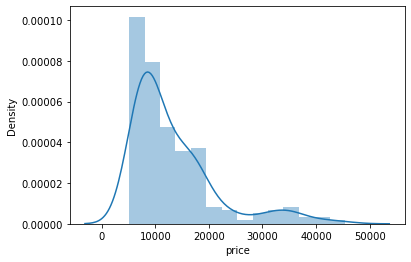

In [14]:
sns.distplot(car['price'])

### Inference :
- The plot seemed to be right-skewed, meaning that the most prices in the dataset are low(Below 15,000).
- There is a significant difference between the mean and the median of the price distribution.
- The data points are far spread out from the mean, which indicates a high variance in the car prices.

### Visualising Categorical Data
- carbrand
- fueltype
- aspiration
- doornumber
- carbody
- drivewheel
- enginelocation
- enginetype
- cylindernumber
- enginesize
- fuelsystem

<AxesSubplot:>

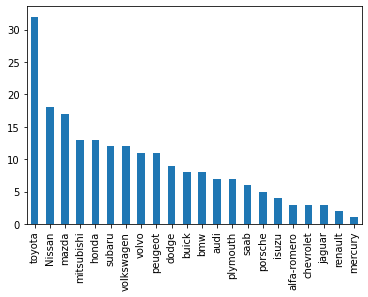

In [15]:
car['Carbrand'].value_counts().plot(kind='bar')

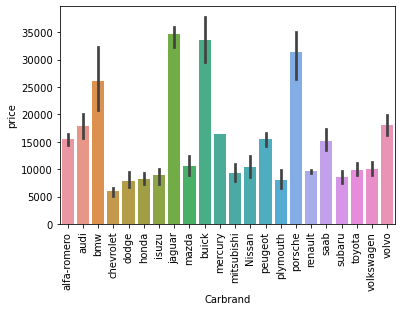

In [16]:
sns.barplot(x=car['Carbrand'],y=car['price'])
plt.xticks(rotation ='vertical')
plt.show()

- Bmw,Jaguar,Buick,Porsche having Higher Price in Luxrius Car's.
- Toyota ,Nissan making More Car's.
- there many brands which are nelow 10000 doller.

In [17]:
# Droping column name CarName 
car = car.drop('CarName',axis = 1)

In [18]:
car.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Carbrand
0,1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


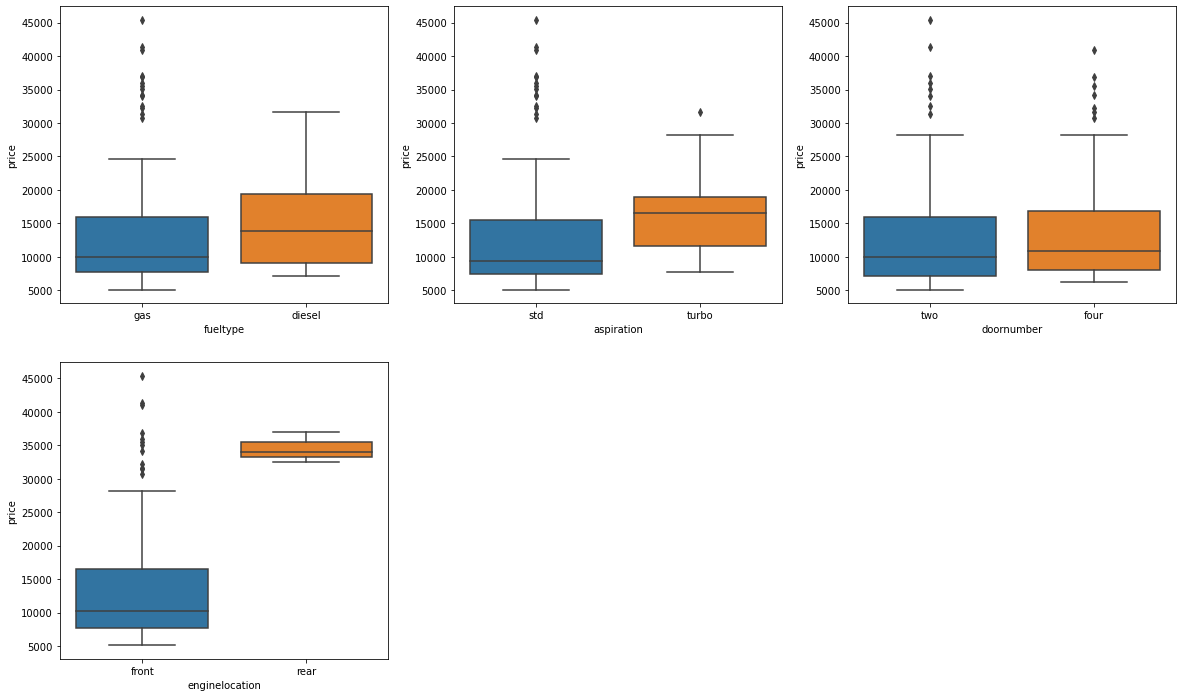

In [19]:
plt.figure(figsize=(20, 12))

plt.subplot(2,3,1)
sns.boxplot(x = 'fueltype', y = 'price', data = car)
plt.subplot(2,3,2)
sns.boxplot(x = 'aspiration', y = 'price', data = car)
plt.subplot(2,3,3)
sns.boxplot(x = 'doornumber', y = 'price', data = car)
plt.subplot(2,3,4)
sns.boxplot(x = 'enginelocation', y = 'price', data = car)


plt.show()

### Inference-
- Slightly price differance between Diseal and Gas in Fueltype , std and Turbo in aspiration ,Two and four doornumber. 
- rear Enginelocation have high price but here data is low.

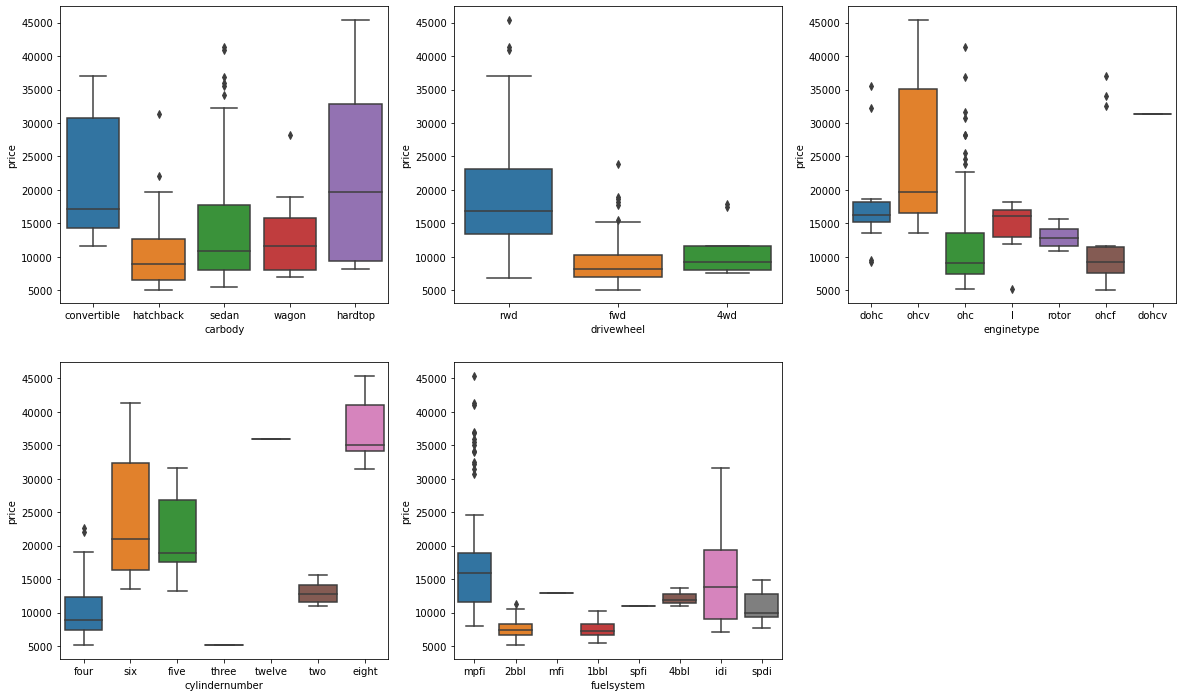

In [20]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'carbody', y = 'price', data = car)
plt.subplot(2,3,2)
sns.boxplot(x = 'drivewheel', y = 'price', data = car)
plt.subplot(2,3,3)
sns.boxplot(x = 'enginetype', y = 'price', data = car)
plt.subplot(2,3,4)
sns.boxplot(x = 'cylindernumber', y = 'price', data = car)
plt.subplot(2,3,5)
sns.boxplot(x = 'fuelsystem', y = 'price', data = car)
plt.show()

### Inference-
- convertible and hardtop carbody have higher average price.
- rwd Drivewheel having high price than others.
- ohcv has the highest price range (While dohcv has only one row), ohc and ohcf have the low price range.
- Most common number of cylinders are four, six and five. Though eight cylinders have the highest price range.
- mpfi and idi having the highest price range.But there are few data for other categories to derive any meaningful inference

In [21]:
#Finding correlation
cor = car.corr()
cor

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,1.000000,-0.151621,0.129729,0.170636,0.052387,0.255960,0.071962,-0.033930,0.260064,-0.160824,0.150276,-0.015006,-0.203789,0.015940,0.011255,-0.109093
symboling,-0.151621,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
wheelbase,0.129729,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,0.170636,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,0.052387,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,0.255960,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,0.071962,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,-0.033930,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,0.260064,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,-0.160824,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443


<AxesSubplot:>

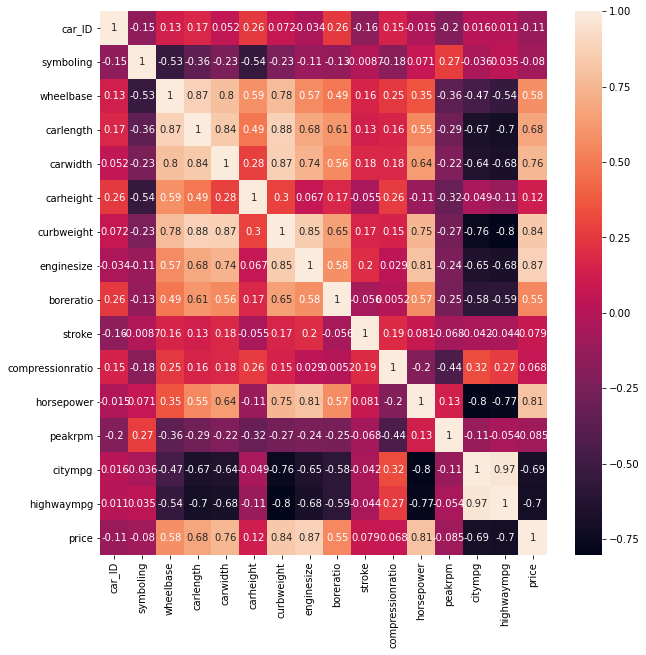

In [22]:
plt.figure(figsize=(10,10))

sns.heatmap(car.corr(),annot=True)

### Findings -
- car-ID,symboling,carheight,stroke,compressionratio,peakrmp has weak correaltion with price

In [23]:
# Droping weak correated columns-
car1=car.drop(['car_ID', 'symboling','carheight', 'stroke', 'compressionratio','peakrpm'],axis=1)
car1.head()

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,horsepower,citympg,highwaympg,price,Carbrand
0,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,2548,dohc,four,130,mpfi,3.47,111,21,27,13495.0,alfa-romero
1,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,2548,dohc,four,130,mpfi,3.47,111,21,27,16500.0,alfa-romero
2,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,2823,ohcv,six,152,mpfi,2.68,154,19,26,16500.0,alfa-romero
3,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,2337,ohc,four,109,mpfi,3.19,102,24,30,13950.0,audi
4,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,2824,ohc,five,136,mpfi,3.19,115,18,22,17450.0,audi


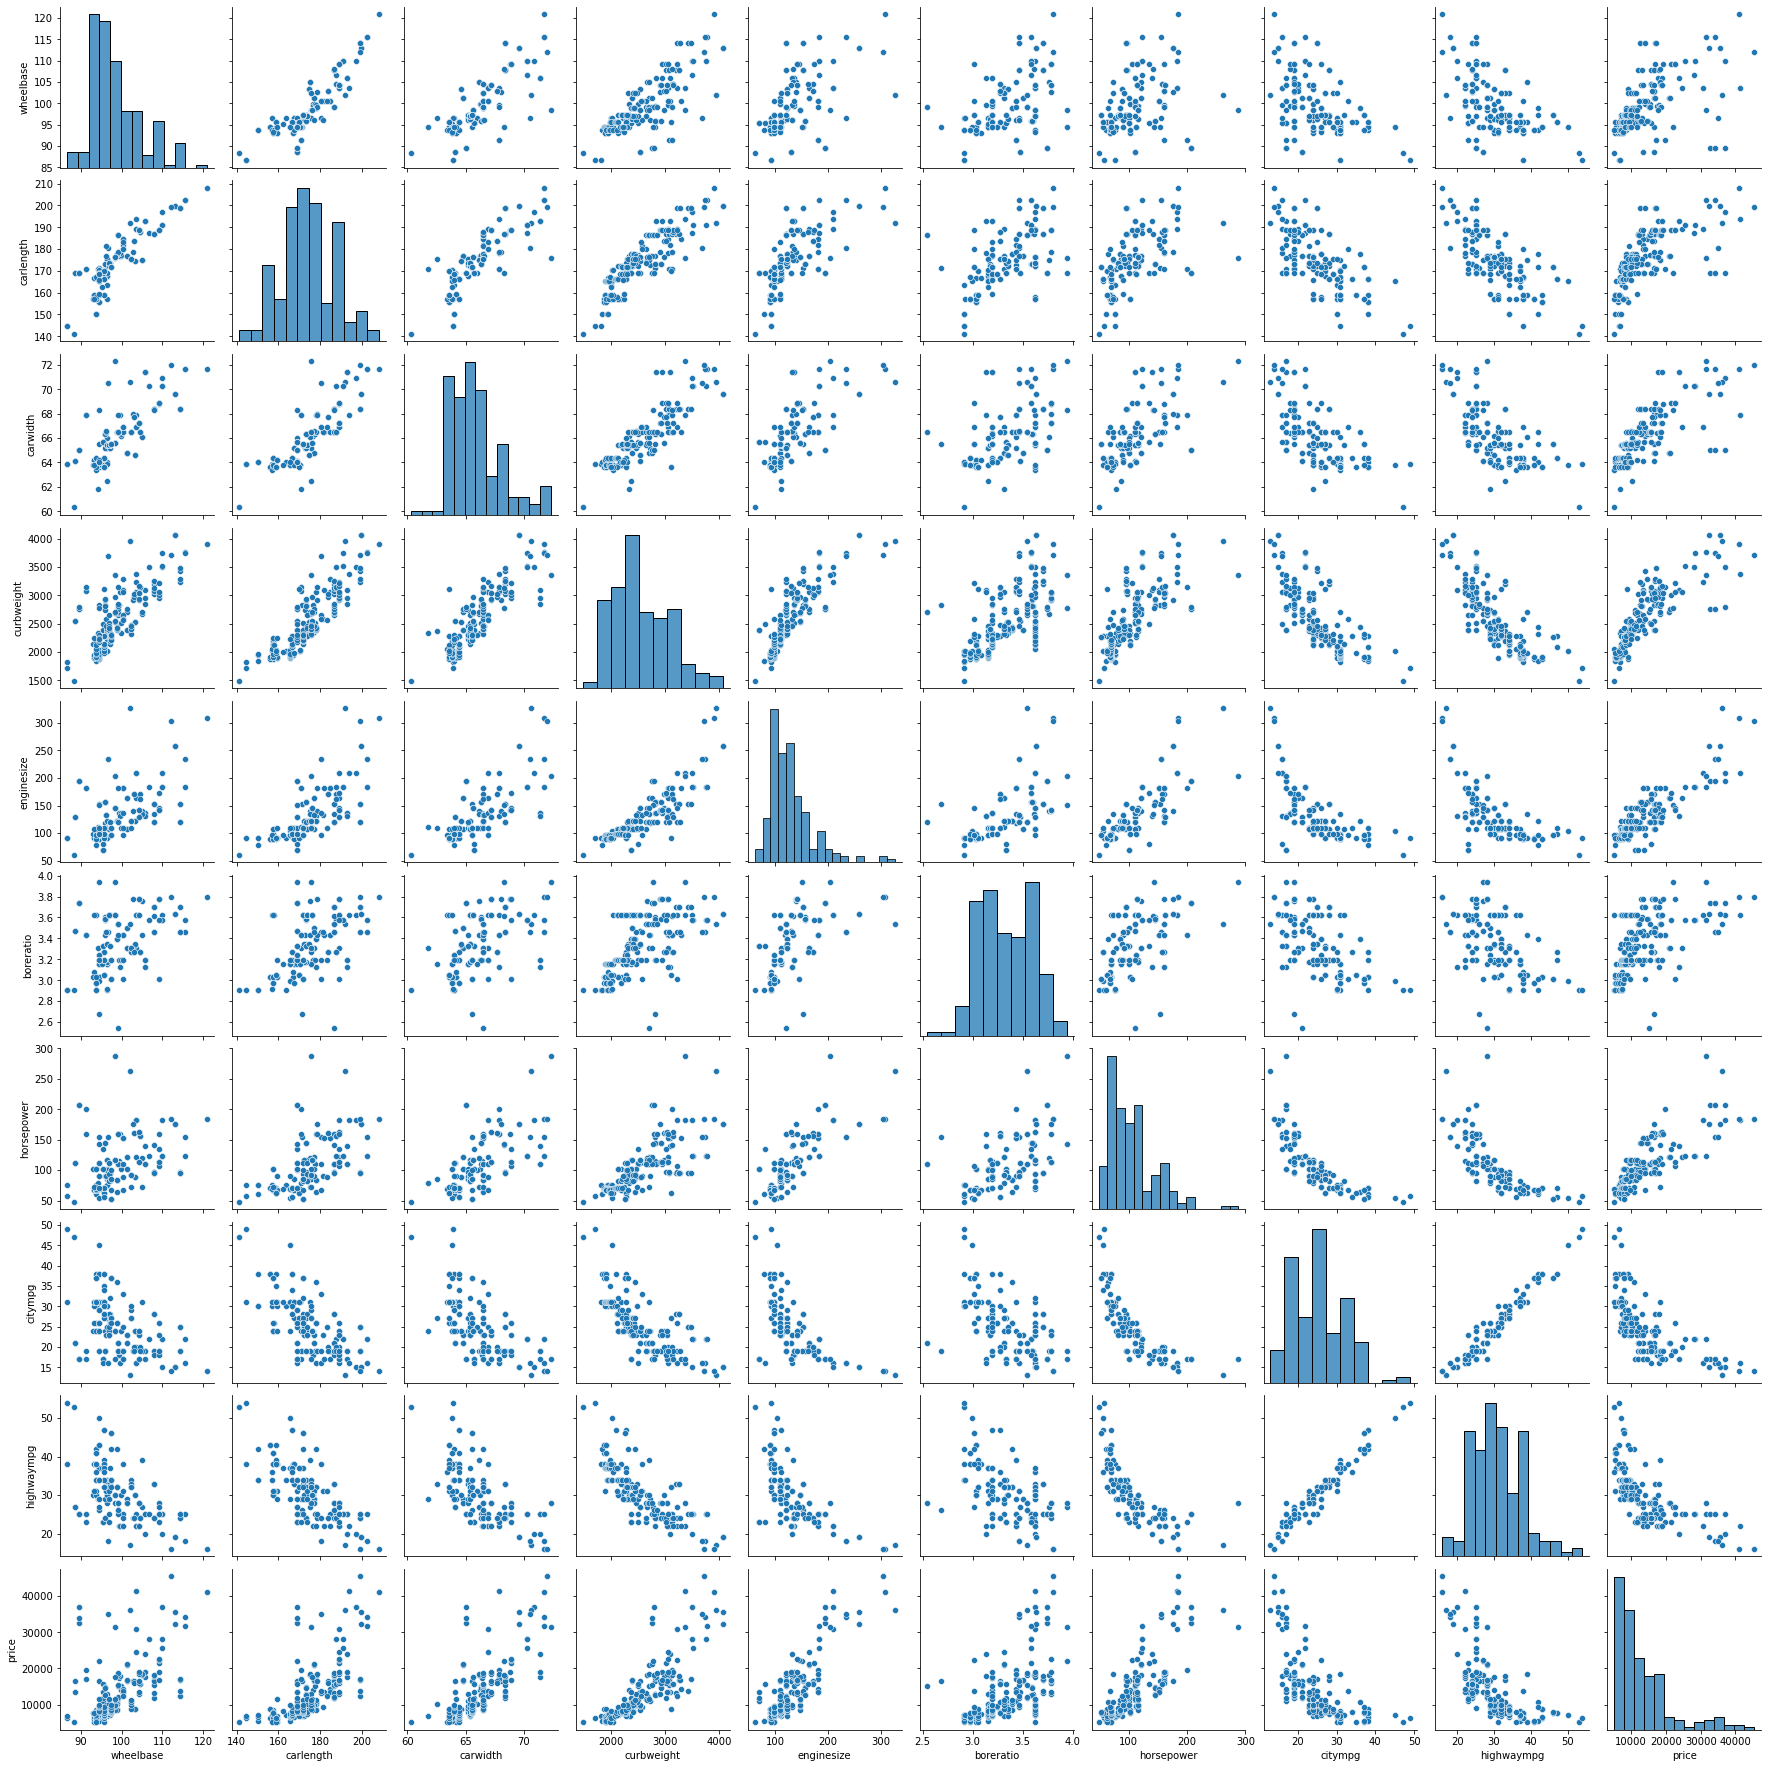

In [24]:
# Checking Linear relation of veriables with price
sns.pairplot(car1)
plt.show()

- All veriables having Linear correaltion with Price

In [25]:
car1['mileage'] = car1['citympg']*0.55 + car1['highwaympg']*0.45

<AxesSubplot:xlabel='mileage', ylabel='price'>

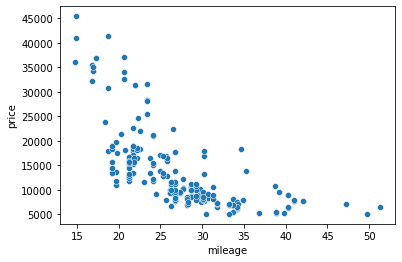

In [26]:
sns.scatterplot(x = 'mileage', y = 'price', data = car1)

- Mileage has Negative Correlation with Price

In [27]:
car1 = car1.drop(['citympg','highwaympg'],axis = 1)

In [28]:
car1.head()

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,horsepower,price,Carbrand,mileage
0,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,2548,dohc,four,130,mpfi,3.47,111,13495.0,alfa-romero,23.70
1,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,2548,dohc,four,130,mpfi,3.47,111,16500.0,alfa-romero,23.70
2,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,2823,ohcv,six,152,mpfi,2.68,154,16500.0,alfa-romero,22.15
3,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,2337,ohc,four,109,mpfi,3.19,102,13950.0,audi,26.70
4,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,2824,ohc,five,136,mpfi,3.19,115,17450.0,audi,19.80


In [29]:
car1.dtypes

fueltype           object
aspiration         object
doornumber         object
carbody            object
drivewheel         object
enginelocation     object
wheelbase         float64
carlength         float64
carwidth          float64
curbweight          int64
enginetype         object
cylindernumber     object
enginesize          int64
fuelsystem         object
boreratio         float64
horsepower          int64
price             float64
Carbrand           object
mileage           float64
dtype: object

### One Hot Encodeing
- applying label encoder on categorical variables

In [30]:

from sklearn import preprocessing
le = preprocessing.LabelEncoder()


car1['Carbrand'] = le.fit_transform(car1['Carbrand'])
car1['fueltype'] = le.fit_transform(car1['fueltype'])
car1['doornumber'] = le.fit_transform(car1['doornumber'])
car1['carbody'] = le.fit_transform(car1['carbody'])
car1['drivewheel'] = le.fit_transform(car1['drivewheel'])
car1['enginelocation'] = le.fit_transform(car1['enginelocation'])
car1['enginetype'] = le.fit_transform(car1['enginetype'])
car1['cylindernumber'] = le.fit_transform(car1['cylindernumber'])
car1['fuelsystem'] = le.fit_transform(car1['fuelsystem'])
car1['aspiration'] = le.fit_transform(car1['aspiration'])

In [31]:
car1.head()

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,horsepower,price,Carbrand,mileage
0,1,0,1,0,2,0,88.6,168.8,64.1,2548,0,2,130,5,3.47,111,13495.0,1,23.70
1,1,0,1,0,2,0,88.6,168.8,64.1,2548,0,2,130,5,3.47,111,16500.0,1,23.70
2,1,0,1,2,2,0,94.5,171.2,65.5,2823,5,3,152,5,2.68,154,16500.0,1,22.15
3,1,0,0,3,1,0,99.8,176.6,66.2,2337,3,2,109,5,3.19,102,13950.0,2,26.70
4,1,0,0,3,0,0,99.4,176.6,66.4,2824,3,1,136,5,3.19,115,17450.0,2,19.80


In [32]:
car1.dtypes

fueltype            int32
aspiration          int32
doornumber          int32
carbody             int32
drivewheel          int32
enginelocation      int32
wheelbase         float64
carlength         float64
carwidth          float64
curbweight          int64
enginetype          int32
cylindernumber      int32
enginesize          int64
fuelsystem          int32
boreratio         float64
horsepower          int64
price             float64
Carbrand            int32
mileage           float64
dtype: object

In [33]:
car1.columns

Index(['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel',
       'enginelocation', 'wheelbase', 'carlength', 'carwidth', 'curbweight',
       'enginetype', 'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio',
       'horsepower', 'price', 'Carbrand', 'mileage'],
      dtype='object')

In [34]:
final_car=pd.DataFrame(car1,columns=['Carbrand','fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel',
       'enginelocation', 'wheelbase', 'carlength', 'carwidth', 'curbweight',
       'enginetype', 'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio',
       'horsepower', 'mileage', 'price'])

### Scaling Data By Using MinMaxScaler

In [35]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
num_vars = ['Carbrand','fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel',
       'enginelocation', 'wheelbase', 'carlength', 'carwidth', 'curbweight',
       'enginetype', 'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio',
       'horsepower', 'mileage', 'price']

final_car[num_vars] = scaler.fit_transform(final_car[num_vars])

In [36]:
final_car.head()

,Carbrand,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,horsepower,mileage,price
0,0.047619,1.0,0.0,1.0,0.00,1.0,0.0,0.058309,0.413433,0.316667,0.411171,0.000000,0.333333,0.260377,0.714286,0.664286,0.262500,0.244170,0.207959
1,0.047619,1.0,0.0,1.0,0.00,1.0,0.0,0.058309,0.413433,0.316667,0.411171,0.000000,0.333333,0.260377,0.714286,0.664286,0.262500,0.244170,0.282558
2,0.047619,1.0,0.0,1.0,0.50,1.0,0.0,0.230321,0.449254,0.433333,0.517843,0.833333,0.500000,0.343396,0.714286,0.100000,0.441667,0.201646,0.282558
3,0.095238,1.0,0.0,0.0,0.75,0.5,0.0,0.384840,0.529851,0.491667,0.329325,0.500000,0.333333,0.181132,0.714286,0.464286,0.225000,0.326475,0.219254
4,0.095238,1.0,0.0,0.0,0.75,0.0,0.0,0.373178,0.529851,0.508333,0.518231,0.500000,0.166667,0.283019,0.714286,0.464286,0.279167,0.137174,0.306142


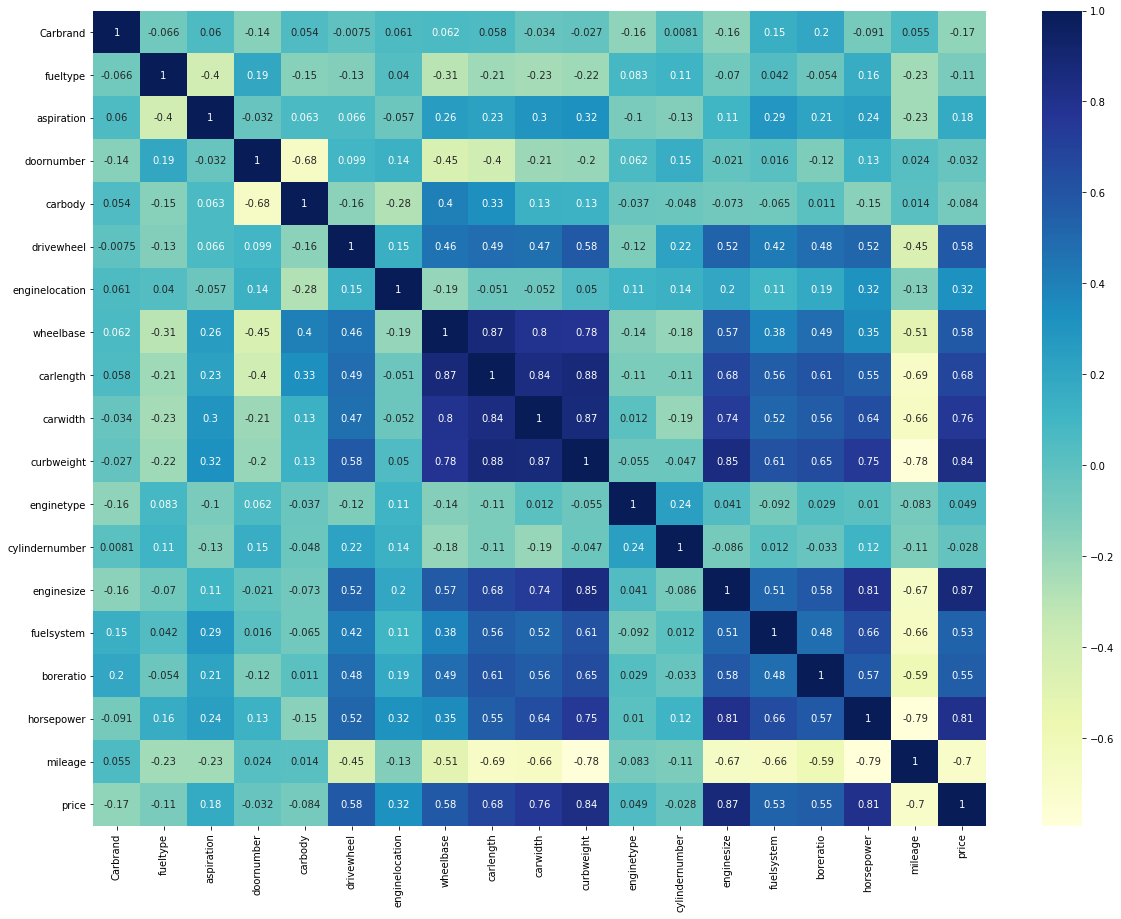

In [37]:
plt.figure(figsize = (20, 15))
sns.heatmap(final_car.corr(), annot = True, cmap="YlGnBu")
plt.show()

- Dropping - Fueltype, Doornumber , Carbody, Cylindernumber, Mileage Becouse of weak correlation

In [38]:
final_car=final_car.drop(['fueltype', 'doornumber','carbody', 'cylindernumber','mileage'],axis=1)

In [39]:
final_car.head()

,Carbrand,aspiration,drivewheel,enginelocation,wheelbase,carlength,carwidth,curbweight,enginetype,enginesize,fuelsystem,boreratio,horsepower,price
0,0.047619,0.0,1.0,0.0,0.058309,0.413433,0.316667,0.411171,0.000000,0.260377,0.714286,0.664286,0.262500,0.207959
1,0.047619,0.0,1.0,0.0,0.058309,0.413433,0.316667,0.411171,0.000000,0.260377,0.714286,0.664286,0.262500,0.282558
2,0.047619,0.0,1.0,0.0,0.230321,0.449254,0.433333,0.517843,0.833333,0.343396,0.714286,0.100000,0.441667,0.282558
3,0.095238,0.0,0.5,0.0,0.384840,0.529851,0.491667,0.329325,0.500000,0.181132,0.714286,0.464286,0.225000,0.219254
4,0.095238,0.0,0.0,0.0,0.373178,0.529851,0.508333,0.518231,0.500000,0.283019,0.714286,0.464286,0.279167,0.306142


# Step 4: Splitting the Data into Training and Testing Sets

In [40]:
X=final_car.drop(["price"],axis=1)
y=final_car["price"]

In [41]:
X.head()

,Carbrand,aspiration,drivewheel,enginelocation,wheelbase,carlength,carwidth,curbweight,enginetype,enginesize,fuelsystem,boreratio,horsepower
0,0.047619,0.0,1.0,0.0,0.058309,0.413433,0.316667,0.411171,0.000000,0.260377,0.714286,0.664286,0.262500
1,0.047619,0.0,1.0,0.0,0.058309,0.413433,0.316667,0.411171,0.000000,0.260377,0.714286,0.664286,0.262500
2,0.047619,0.0,1.0,0.0,0.230321,0.449254,0.433333,0.517843,0.833333,0.343396,0.714286,0.100000,0.441667
3,0.095238,0.0,0.5,0.0,0.384840,0.529851,0.491667,0.329325,0.500000,0.181132,0.714286,0.464286,0.225000
4,0.095238,0.0,0.0,0.0,0.373178,0.529851,0.508333,0.518231,0.500000,0.283019,0.714286,0.464286,0.279167


In [42]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)

In [43]:
len(X_train)

143

In [44]:
X_train.head()

,Carbrand,aspiration,drivewheel,enginelocation,wheelbase,carlength,carwidth,curbweight,enginetype,enginesize,fuelsystem,boreratio,horsepower
40,0.333333,0.0,0.5,0.0,0.288630,0.511940,0.183333,0.342901,0.500000,0.184906,0.000000,0.435714,0.158333
60,0.476190,0.0,0.5,0.0,0.355685,0.547761,0.516667,0.357642,0.500000,0.230189,0.142857,0.607143,0.150000
56,0.476190,0.0,1.0,0.0,0.253644,0.416418,0.450000,0.346005,1.000000,0.033962,0.285714,0.564286,0.220833
101,0.000000,0.0,0.5,0.0,0.402332,0.605970,0.516667,0.623351,0.833333,0.452830,0.714286,0.635714,0.433333
86,0.571429,0.0,0.5,0.0,0.282799,0.467164,0.425000,0.355702,0.500000,0.230189,0.142857,0.578571,0.166667


# Step 5: Building a Linear Regression model

In [45]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [46]:
y_pred = lm.predict(X_test)

In [47]:
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [48]:
print('MAE: ',(metrics.mean_absolute_error(y_test,y_pred)))
print('MSE: ',(metrics.mean_squared_error(y_test,y_pred)))
print('R2 score:',(metrics.r2_score (y_test,y_pred)))

MAE:  0.05915116288072953
MSE:  0.0074787685138174844
R2 score: 0.8162351818162223


- r2 score is 81.62% which is good fit model.

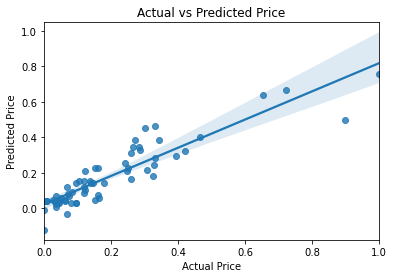

In [49]:
sns.regplot(x=y_test,y=y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Price")
plt.show()

In [ ]:
# End